In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/Users/Shreyas/Desktop/Jupyter/Datasets/cluster_mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
df.shape

(392, 9)

In [4]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
df.origin.value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [7]:
df['model_year'].nunique()

13

In [ ]:
Do not take column 'name' into considerations:

In [8]:
df_w_dummies = pd.get_dummies(df.drop('name', axis=1)) ### One-hot encoding
df_w_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
388,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
389,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
390,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [9]:
###MIN-MAX SCALING (x-xmin)/(xmax-xmin)

from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
scaled_data = scaler.fit_transform(df_w_dummies)
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [12]:
scaled_df = pd.DataFrame(scaled_data, columns=df_w_dummies.columns)
scaled_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0


Heat Map - Represents the Corelation (-1 to +1).

<AxesSubplot:>

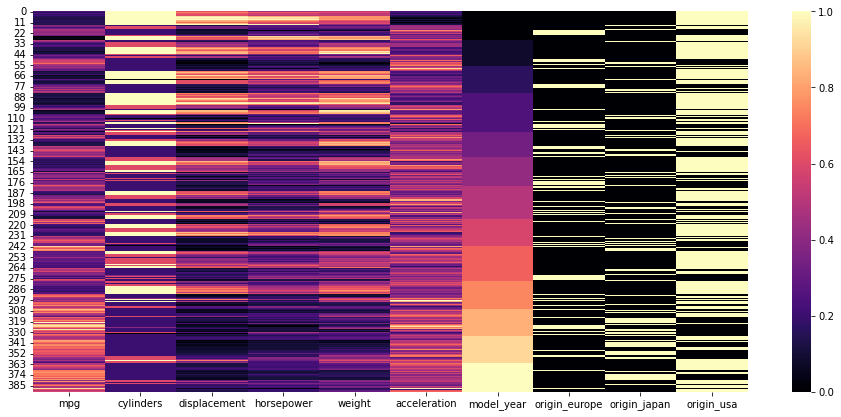

In [13]:
plt.figure(figsize=(16,7))
sns.heatmap(scaled_df, cmap='magma')

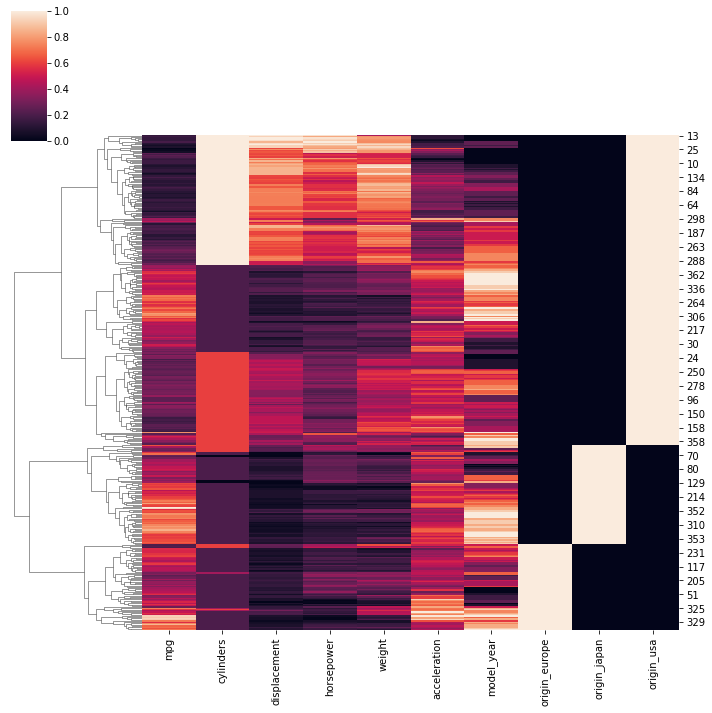

In [14]:
sns.clustermap(scaled_df, col_cluster=False)

In [15]:
## scikit-learn

from sklearn.cluster import AgglomerativeClustering

In [16]:
model_4 = AgglomerativeClustering(n_clusters=4)

In [17]:
cluster_labels = model_4.fit_predict(scaled_df)
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

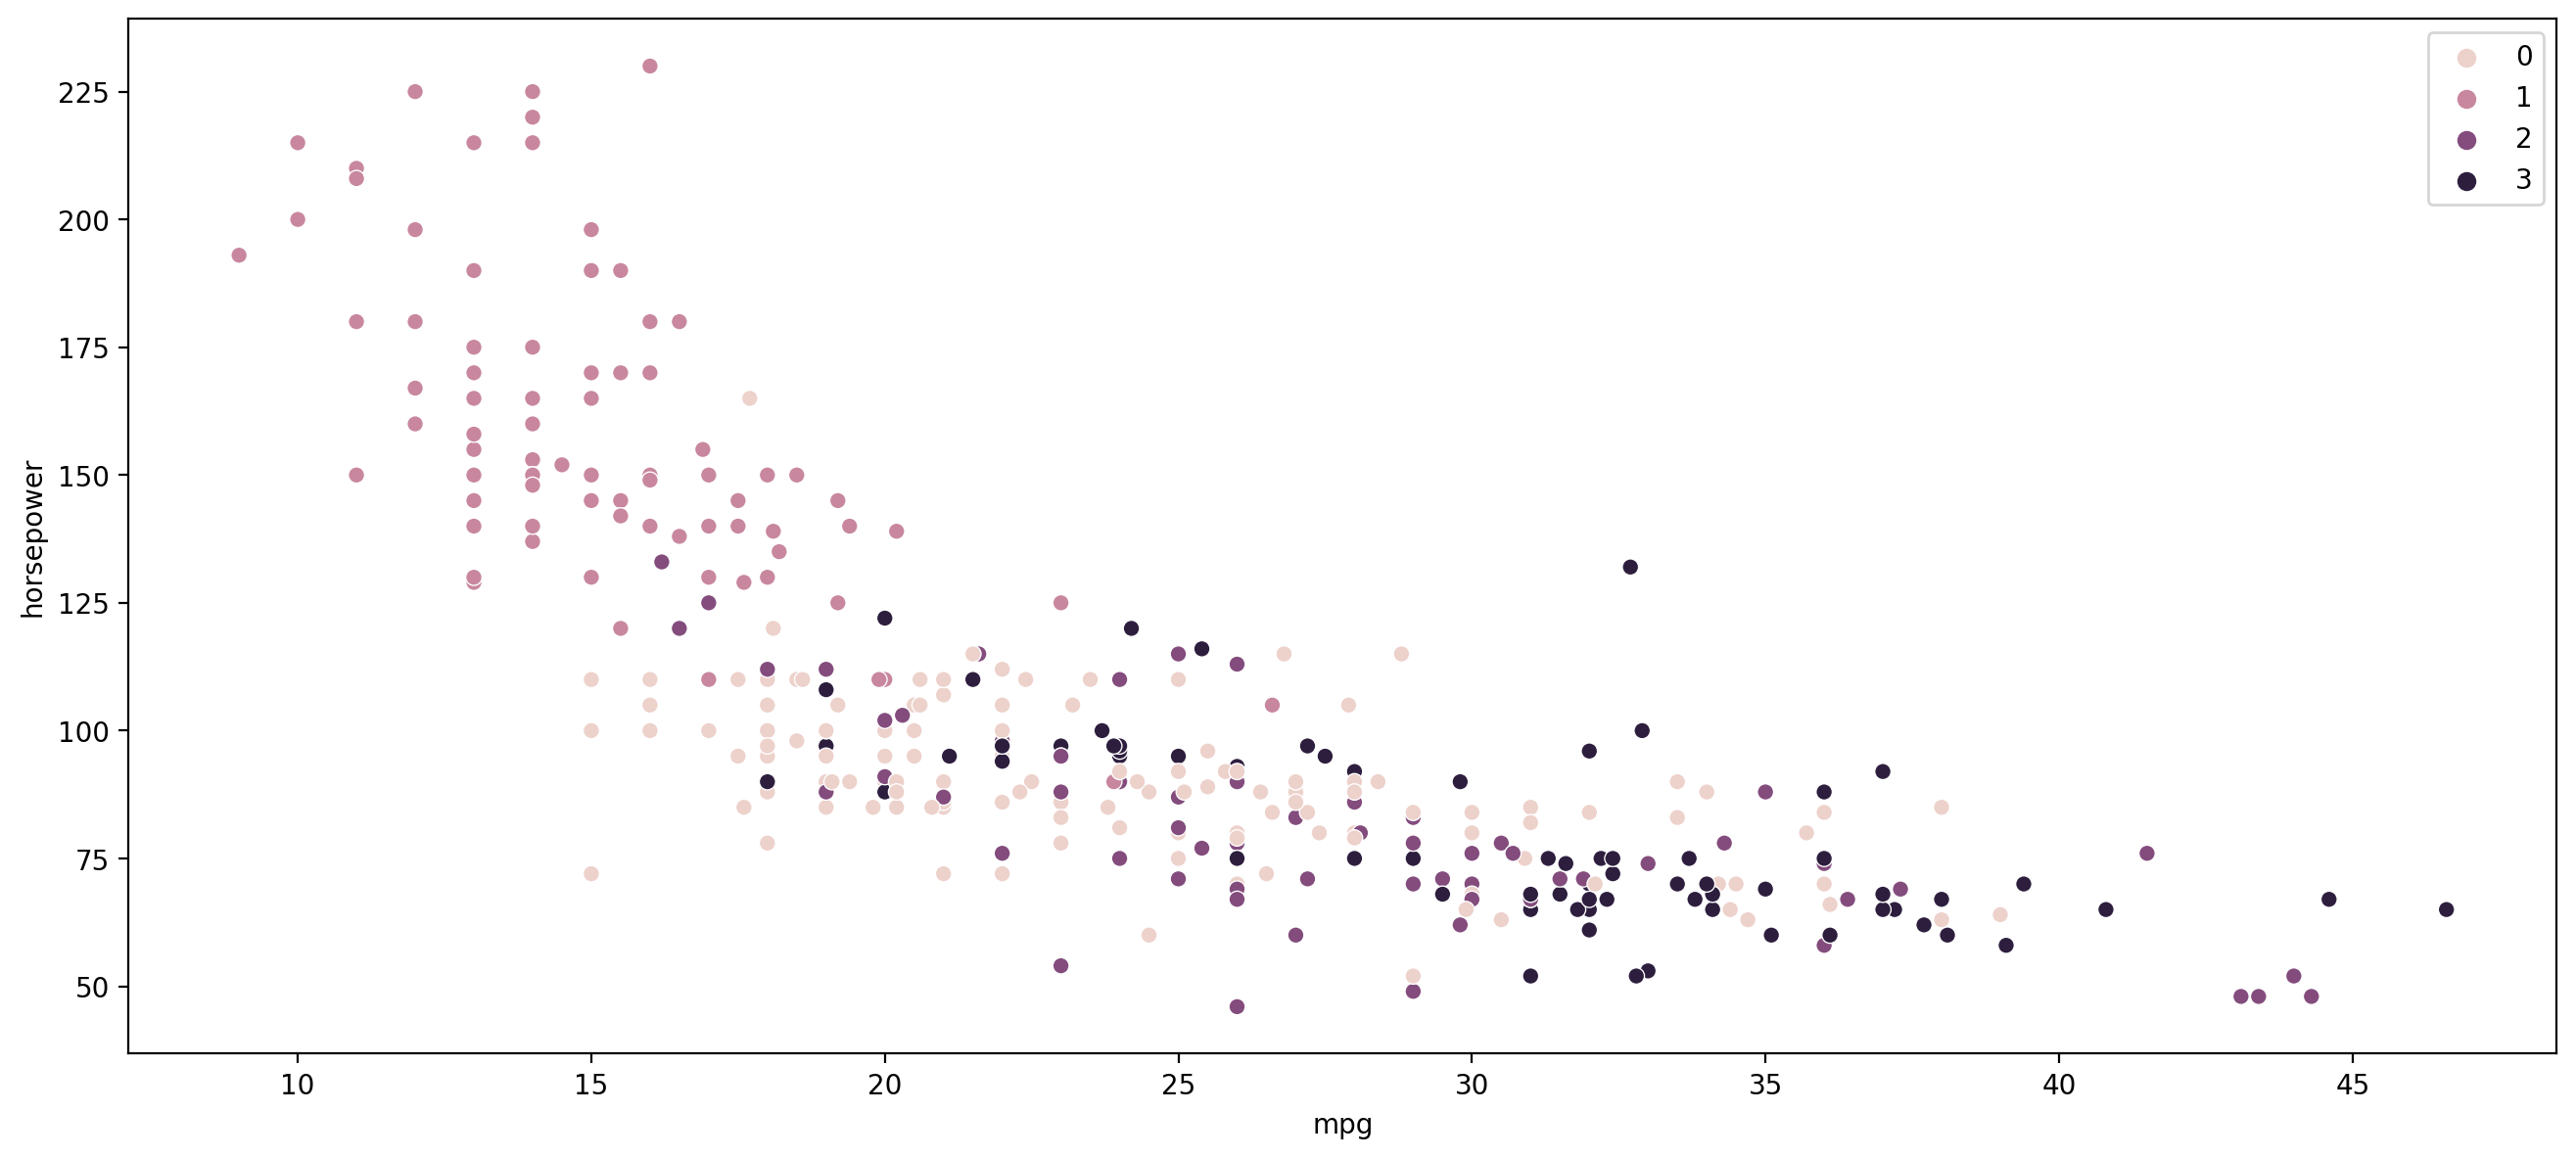

In [18]:
plt.figure(figsize=(16,7), dpi=200)
sns.scatterplot(data = df, x='mpg', y='horsepower', hue=cluster_labels)

In [19]:
len(scaled_df.columns)  ### total no of features

10

In [20]:
## max distance possible between two points = sqrt(n_features)
np.sqrt(10)

3.1622776601683795

3.1622776601683795 : This can be the max distance between the two datapoints 

In [21]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

In [27]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=3.1622776601683795)

In [28]:
cluster_labels = model.fit_predict(scaled_df)
cluster_labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1, 1, 1, 4, 2, 2, 2,
       2, 2, 1, 3, 3, 3, 3, 4, 0, 4, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 0, 1, 1, 0, 2, 2, 2, 4, 4, 2, 0, 4, 0, 2, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 2, 2, 2, 0, 4, 4, 0, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 1, 4, 0, 4,
       4, 0, 1, 2, 3, 3, 2, 2, 2, 2, 3, 2, 4, 3, 1, 1, 1, 4, 0, 4, 0, 1,
       1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 4, 4, 0, 2, 2, 4, 4, 2, 1, 1, 1, 1,
       5, 3, 3, 3, 1, 1, 1, 1, 1, 5, 5, 4, 0, 1, 0, 4, 2, 4, 1, 2, 1, 2,
       2, 2, 2, 4, 2, 2, 0, 0, 2, 5, 5, 5, 5, 1, 1, 1, 1, 0, 0, 2, 4, 1,
       1, 1, 1, 2, 4, 4, 0, 2, 5, 2, 4, 2, 5, 5, 5, 5, 4, 0, 2, 0, 4, 5,
       5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 5, 2, 0, 4, 0, 0, 0, 4, 2, 4, 2, 4,
       2, 0, 4, 6, 4, 5, 5, 5, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 5, 1, 5, 5,
       0, 4, 4, 0, 4, 0, 0, 4, 2, 2, 2, 2, 2, 4, 1, 1, 0, 1, 1, 5, 5, 5,
       5, 5, 5, 5, 5, 2, 4, 0, 0, 2, 5, 2, 5, 0, 0,

In [23]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [24]:
##linkage

linkage_matrix = hierarchy.linkage(model_4.children_)
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

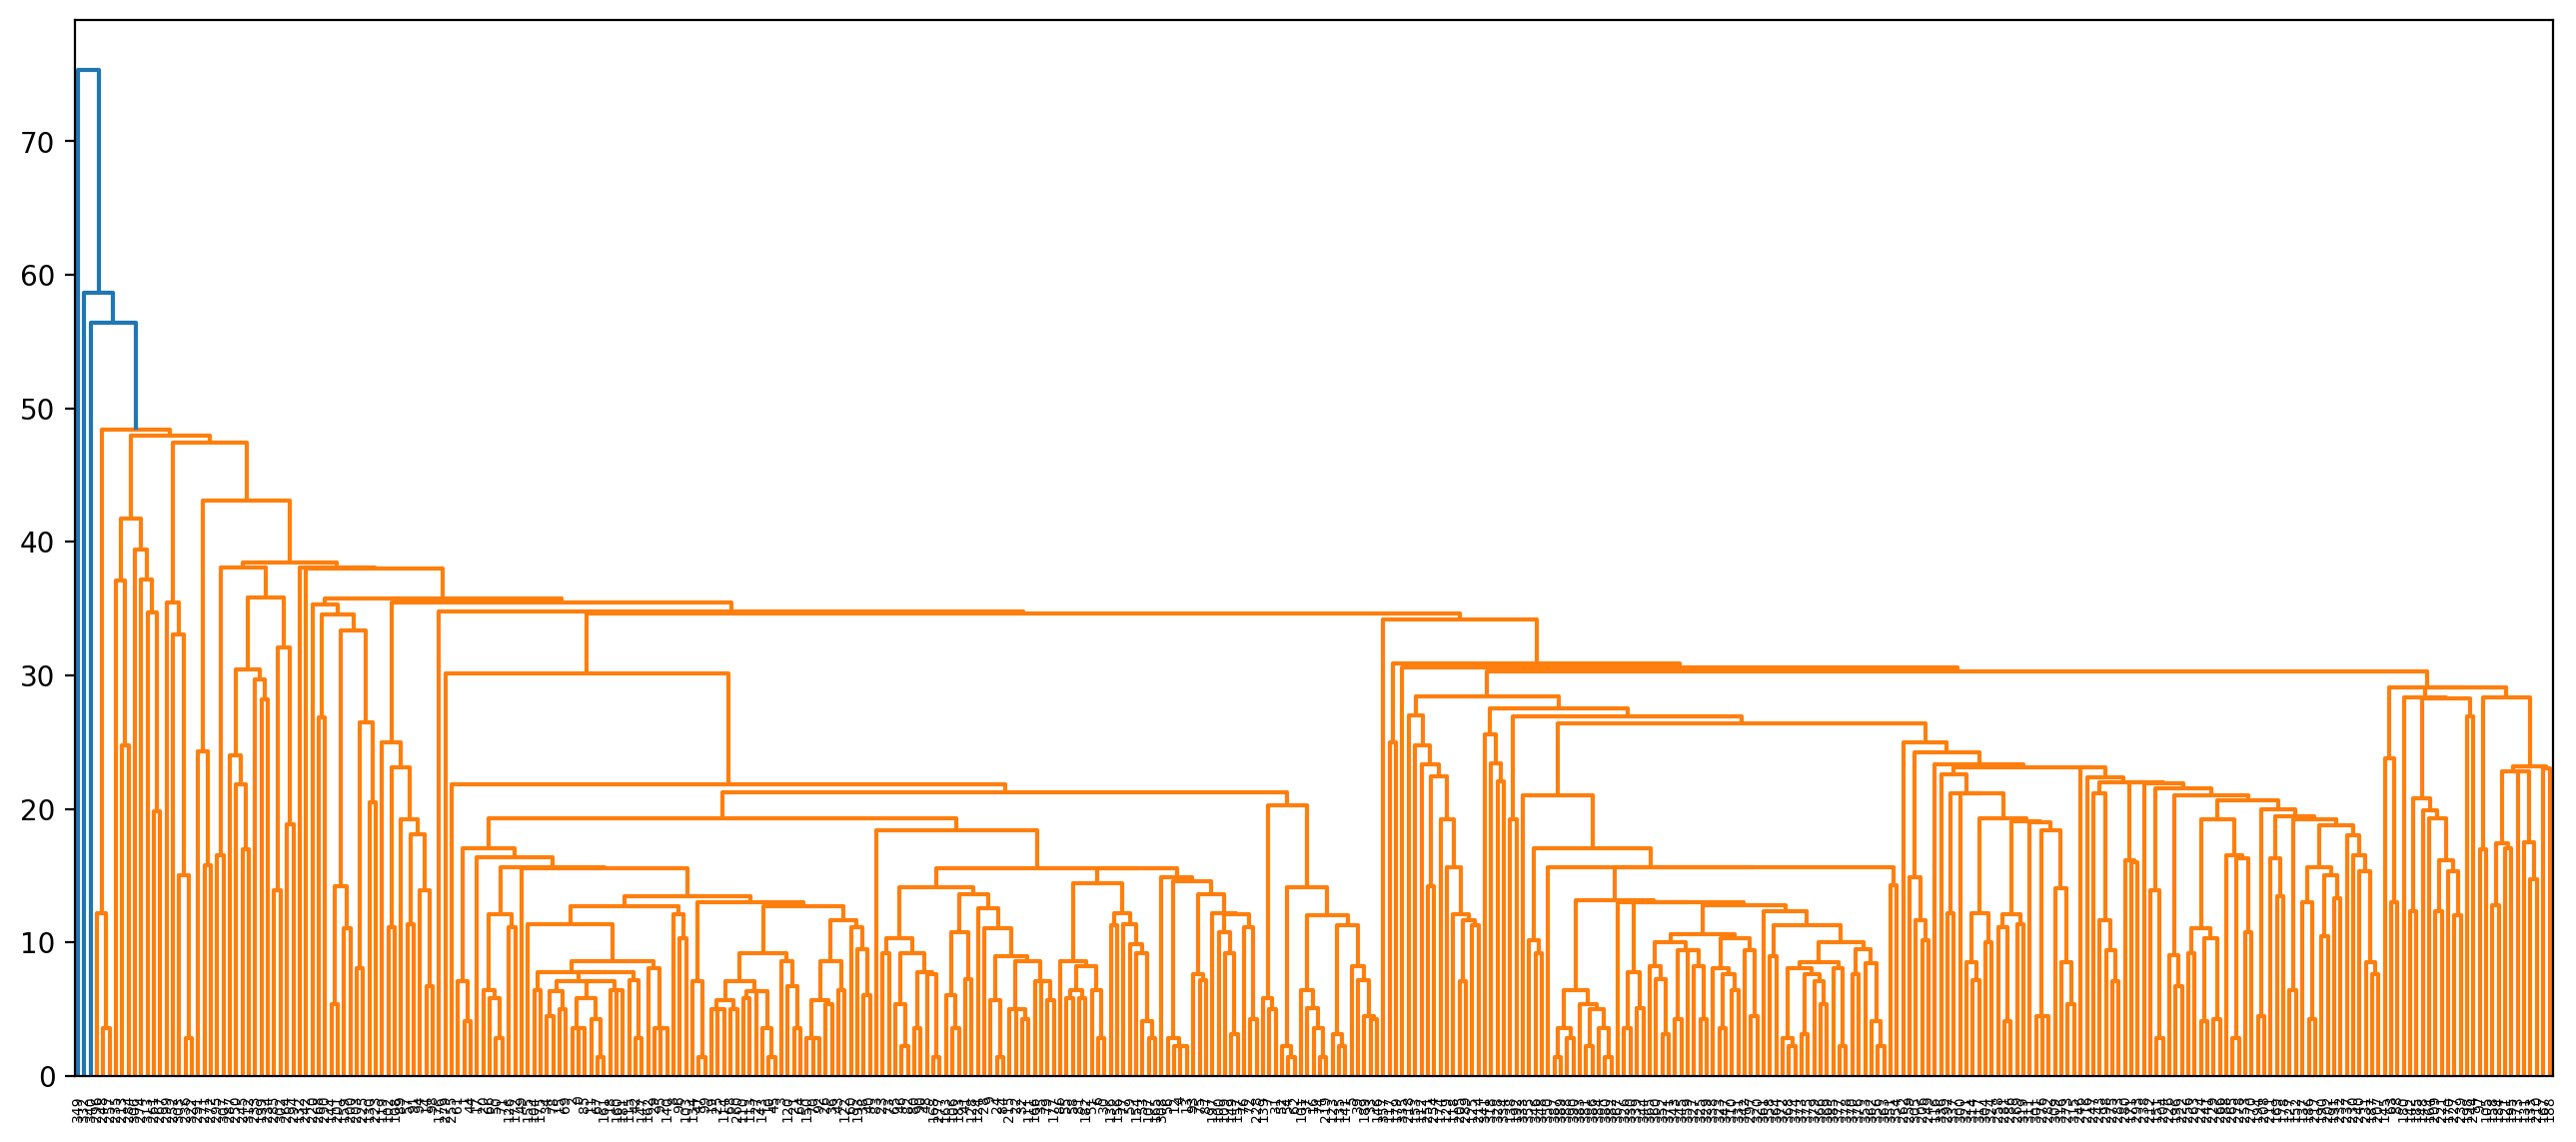

In [25]:
plt.figure(figsize=(16,7), dpi=200)
dm = hierarchy.dendrogram(linkage_matrix)

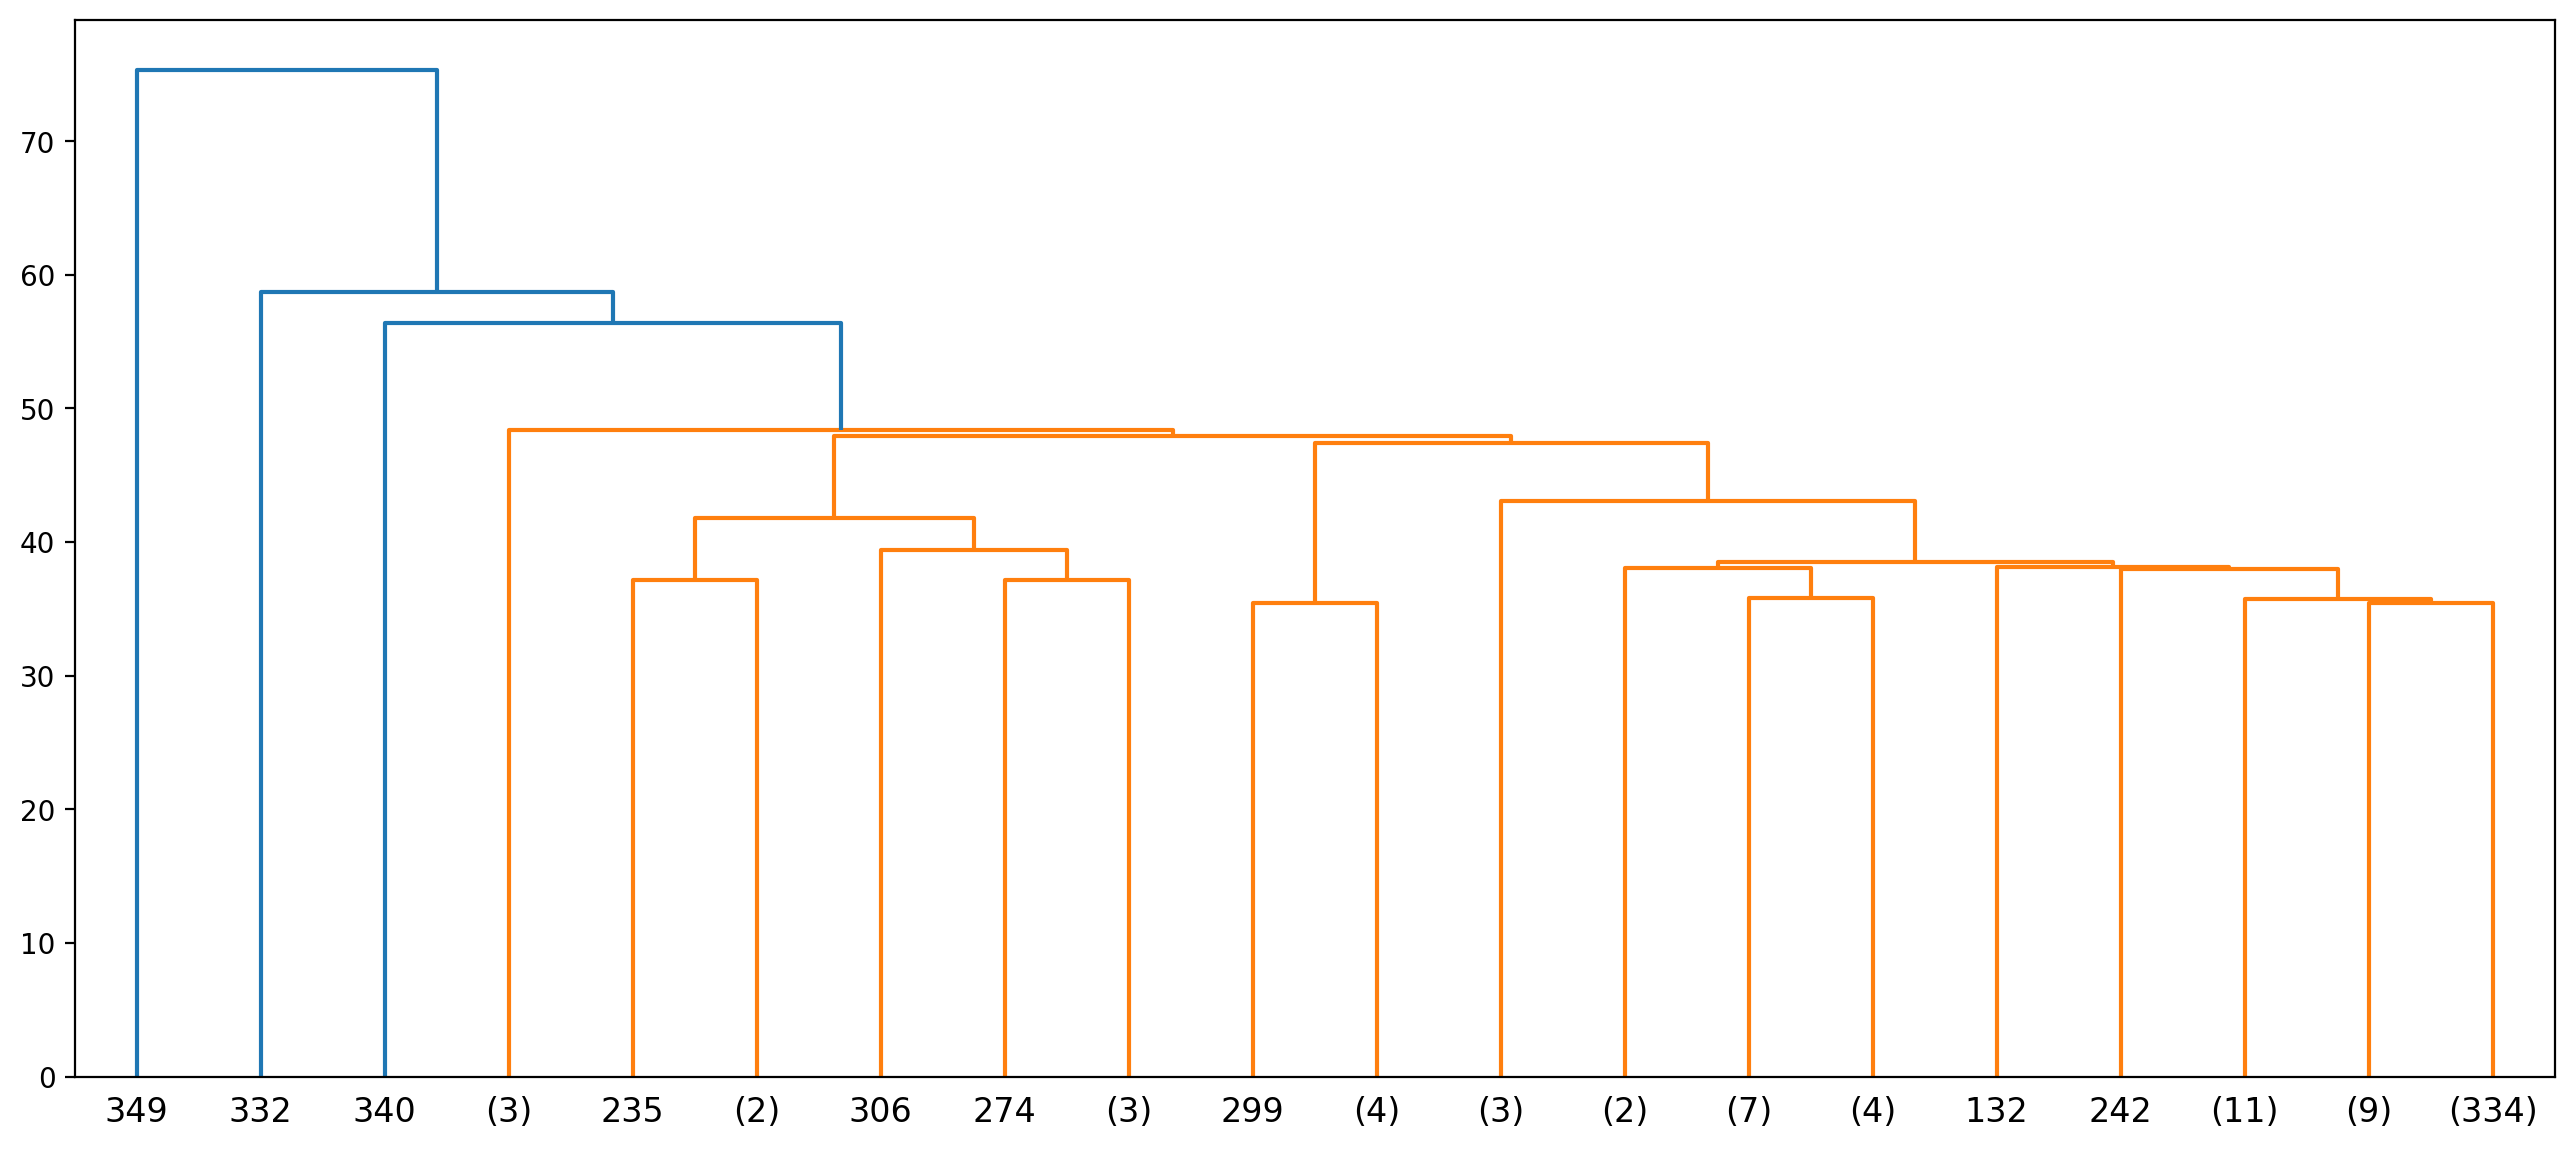

In [26]:
plt.figure(figsize=(16,7), dpi=200)
dm = hierarchy.dendrogram(linkage_matrix, truncate_mode='lastp', p=20)

Observation from the above graph: The cluster from (3) to (334)
    Explains from that the cluster is overlapping also blue changes to red in color.